In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import seaborn as sns

# Linear Discriminant Analysis
This is a supervised learning algorithm used to classify a data set into multiple classes. It is a linear transformation technique which seeks to find a set of linear combinations of variables that best separate classes of data.
It is particularly useful when dealing with high dimensional dataset because like the PCA it reduces the number of the dimensions.

### Plan for the Data Analysis:
1) Prepare the data
2) Implement the Logistic Regression Model
3) Evaluate and visualize the model
4) Implement the LDA (Linear Discriminant Analysis)
5) Analyse with the Receiver Operating Characteristic
6) Count the misclassified fraud of the LDA

In [69]:
# 1 : Prepare the data
dataset = pd.read_csv('/Users/simonamar-roisenberg/Desktop/Python Projects/Statistics LR LDA/creditcard_2023.csv', index_col = 'id')
x = dataset.drop('Class', axis=1)
y = dataset['Class']
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.8)

# 2 : Implement the Logistic Regression Model
LR_model = LogisticRegression().fit(X_train, Y_train)
Y_pred = LR_model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)

Accuracy: 0.9565886428784974
Confusion Matrix:
[[55328  1220]
 [ 3717 53461]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     56548
           1       0.98      0.93      0.96     57178

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726



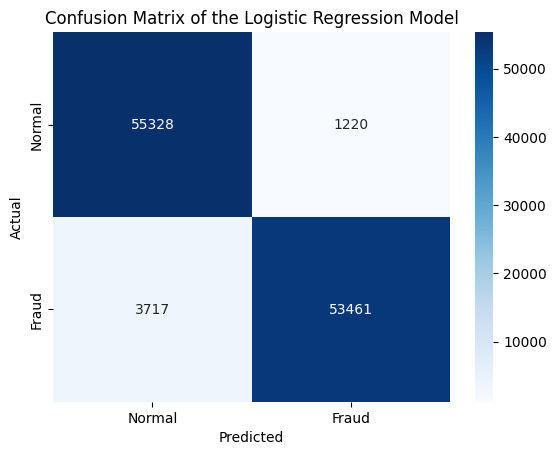

In [ ]:
# 3 : Evaluate and visualize the Logistic Regression Model
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of the Logistic Regression Model')
plt.savefig('Logistic Regression Model.jpg')
plt.show()


Original Data shape: (454904, 29) 
Modified Data shape: (454904, 1)


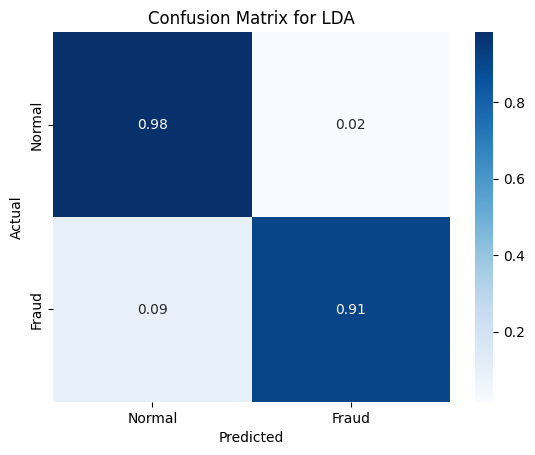

In [ ]:
# 4 : Implement the LDA (Linear Discriminant Analysis)
LDA_model = LDA()
X_train_lda = LDA_model.fit_transform(X_train, Y_train)
X_test_lda = LDA_model.fit_transform(X_test, Y_test)
print("Original Data shape:",X_train.shape, "\nModified Data shape:", X_train_lda.shape)

LDA_model = LDA_model.fit(X_train, Y_train)

LDAtrain_preds = LDA_model.predict(X_train)
conf_matrix_LDA = confusion_matrix(Y_train, LDAtrain_preds, normalize='true')

sns.heatmap(conf_matrix_LDA, annot=True, fmt='.2f', cmap='Blues', xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for LDA')
plt.savefig('Confusion Matrix for LDA.jpg')
plt.show()

5) Using the LDA model, we are going to predict the probability that each transaction is a fraud. We are calculating the rate of the true positive and the flase positive.
Then we plot the true positive rate in function of the false positive : the more the ROC curve is far from the identity line.

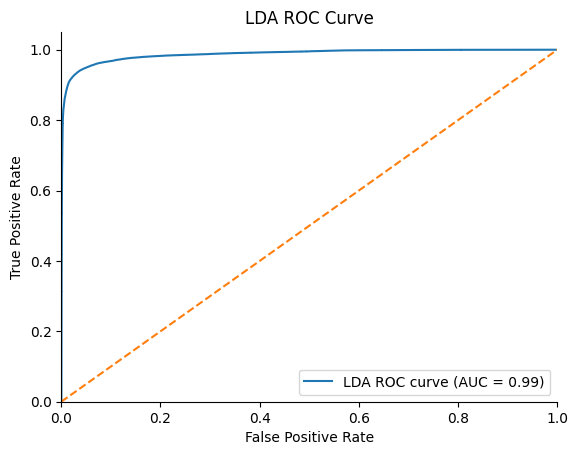

In [ ]:
# Predict probabilities of the Fraud
Y_train_proba = LDA_model.predict_proba(X_train)[:, 1]  # Get probabilities for the fraud case

# Compute ROC curve (Receiver Operating Characteristic)
fpr, tpr, thresholds = roc_curve(Y_train, Y_train_proba) 

# Calculate AUC (Area Under the ROC Curve)
auc = roc_auc_score(Y_train, Y_train_proba)

plt.plot(fpr, tpr, label=f'LDA ROC curve (AUC = {round(auc,2)})')
plt.plot([0, 1], [0, 1], '--')  # Random guessing line
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False) # Remove the top and right bar of the graph
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LDA ROC Curve')
plt.legend(loc="lower right")
plt.savefig('LDA ROC curve.jpg')
plt.show()

In [ ]:
# 6 : Count the misclassified fraud of the LDA
misclassified_count = len(Y_train[Y_train != LDAtrain_preds])
total_cases = len(Y_train)
error_rate = np.around((misclassified_count / total_cases) * 100, 3)

print(f"{misclassified_count} / {total_cases} cases misclassified by LDA, Error rate : {error_rate}%.")

23954 / 454904 cases misclassified by LDA, Error rate : 5.266%.
